# Project tasks

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- These tasks are intended to be open-ended, use the questions as a guide but do please investigate the datasets to answer other interesting questions about them

---

## Task 1 - Code review

This task is to write a code review *not* to write python code to solve the problem brief. 

A colleague has been asked to write some code to answer the following brief:

---

### Brief:
The determinant of an $n\times n$ matrix $A$ can be calculated recursively by "row/column expansion", for any given row $i$:

$$
\textrm{det}(A) = \sum_{j=1}^n (−1)^{(i+j)}\,\,a_{ij}\,\, \textrm{det}(\bar{A}_{ij})
$$

where $a_{ij}$ is the element of $A$ in the $i$-th row and $j$-th column, and $\bar{A}_{ij}$ is the $(n − 1)\times (n − 1)$ matrix obtained from $A$ by deleting the $i$-th row and $j$-th column.

The above formula works for any $i$ (you can just use $i = 1$: expansion of the first row).

You should:

Write a function to (recursively) work out the determinant of a two-dimensional Numpy array without using the inbuilt functions. 

Write a further function which determines the area of a triangle with vertices at the coordinates $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, which is given by the absolute value of:

$$
\frac{1}{2}\textrm{det}\left(\begin{array}{ccc}
x_1 & y_1 & 1\\
x_2 & y_2 & 1\\
x_3 & y_3 & 1
\end{array}\right)
$$
using your determinant function.

---

### Your task:

You have been asked to write a review of their code. Here is the code they produced:

In [1]:
#Issues: det is a keyword. Chnage to det_ or similar
#Write function description an inputs/outputs
#remove testing code #print(c)

from numpy import *

def my_det(A,n):
# Calculate the determinant of a matrix
    if n==1:
        return A[0,0]  #Return a single value in this case
    else:
     det = 0.0
     for j in range(0,n-1):
          # Remove the row and column:  
          B = delete(A,0,axis=0)
          C = delete(B,j,axis=1)
          #print(C)
          det = det + (-1)**(1+j)*A[0,j]*my_det(C,n-1) #implement the formula
    return det

def TriArea(a,b,c):
  '''
  Get the area of a triangle a,b,c.
  '''
  A = array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
  return 0.5*my_det(A,3)

 # Test on the identity matrix:
A = identity(3)
print(my_det(A,3))
print(linalg.det(A))  #compare with built-in function

1.0
1.0


You should write your review here. 
Things you could choose to discuss:
- Code structure 
- Code style 
- Does it answer the brief?
- Does it work? If not could it be fixed?
- Can you explain what it does?

Keep your answer relatively brief (approx. 500 words).

---

In [50]:
a = '1997-9'
print(a)
print(a[0].isnumeric())
print(a.split('-')[0])

1997-9
True
1997


## Task 2 - Weather data

Investigate the data file 'JCMB_2015.csv' containing weather data from the weather station on the roof of the JCMB building from [here](https://www.ed.ac.uk/geosciences/weather-station/weather-station-data).

- Make some plots of the different columns. 
- In particular I am interested in the wind direction and wind speed. Does any of the data in those columns look questionable, or missing? Think critically about these columns, and the data they contain. Can they be cleaned up if needed?
- Make an appropriate visualisation of the wind speed and direction, I am looking for some kind of polar plot based on the wind direction - like [this](https://en.wikipedia.org/wiki/Wind_rose) sort of plot.
- Can you calculate some more statistical properties of this dataset - do they answer any other interesting questions?

Make sure to include here all the code used to generate your answer as well as any plots you make.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


wdata = pd.read_csv("JCMB_2015.csv")
print(list(wdata))

['date-time', 'atmospheric pressure (mBar)', 'rainfall (mm)', 'wind speed (m/s)', 'wind direction (degrees)', 'surface temperature (C)', 'relative humidity (%)', 'solar flux (Kw/m2)', 'battery (V)']


---

## Task 3 - Tate gallery data

The next task is to consider the dataset in the file 'artwork_data.csv' which is an archive of Tate gallery artworks (found [here](https://github.com/tategallery/collection)). This data is kindly supplied for use by the Tate gallery under a Creative Commons Public Domain CC0 licence. If you haven't heard of it the [Tate Galleries](http://www.tate.org.uk) are a number of important galleries spread across Britain, with a main location in London.

- To read in this data in Pandas you may need to set the option `low memory = False` within the `read_csv` function.
- How many artists and artworks does the Tate gallery own?
- Which artist has the most artworks owned by the Tate? which artist has the next most?
- How many artworks by Andy Warhol does the Tate own?
- Which artwork is the widest, and who is the artist?
- Create a histogram for the number of artworks owned by the Tate binned by the year that they were created.
- Can you use the data to answer any other interesting questions about the artwork collection?

You might need to think about cleaning the data to be able to do some of these tasks, dropping missing values, removing text from columns of numbers, etc. Please include all the code used to generate your answer and plots.

['id', 'accession_number', 'artist', 'artistRole', 'artistId', 'title', 'dateText', 'medium', 'creditLine', 'year', 'acquisitionYear', 'dimensions', 'width', 'height', 'depth', 'units', 'inscription', 'thumbnailCopyright', 'thumbnailUrl', 'url']
The total number of artists who's work is contained in the Tate Galleries is 3336
The total number of paintings held in the Tate Galleries is 69201


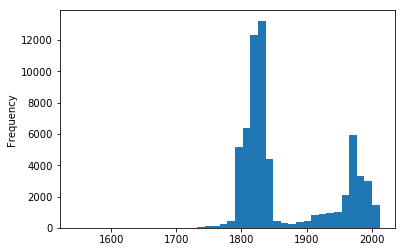

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


tate = pd.read_csv("artwork_data.csv",low_memory=False)
# To see all availible data types
headings = list(tate)
print(headings)

#Extract all artists/id's and remove duplicate artists
Nartists = len(tate.drop_duplicates('artist','first').loc[:,'artist'])
Npaintings = len(tate.loc[:,'id'])
print("The total number of artists who's work is contained in the Tate Galleries is " + str(Nartists))
print("The total number of paintings held in the Tate Galleries is " + str(Npaintings))


#Clean year data and plot histogram
years = tate['year'].dropna(axis=0,how='any').map(lambda x: x.lstrip('cC.').split('-')[0])
years = years[years.map(lambda y: y[0].isnumeric())]
years.astype(float).plot(kind='hist',bins=40)
plt.show()



---

## Task 4 - Text data analysis

The final task concerns the text file 'wssnt10.txt' which contains the text of William Shakespeare's Sonnets (a type of poem - these are some of the most famous in English). There are 154 sonnets, and the task is to investigate them, and in particular to decide how positive or negative each sonnet is. To that end there are two more data files 'positive-words.txt' and 'negative-words.txt' which contain lists of positive and negative words respectively. These words come from the paper *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. So whilst the words are not ideal for our purpose (since they are mainly to do with product review sentiments), they still represent an interesting way to examine our poems.
- You should read in all three of the data files. You will need to split the sonnets in 'wssnt10.txt' up so that each poem can be considered individually. Note each one is marked at the start by a Roman numeral.
- You need to invent a metric for how positive or negative a poem is based on how many of the words in it are in the positive/negative word lists. For instance, is a poem containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the poem.
- Make a plot of the measure you have invented as a y-axis, with poem number as an x-axis.
- Which is the most positive poem, and which the most negative poem? What is the text of those poems? Does your measure make sense when you look at the poems?
- Can you use this data to answer any other questions about the data, or to compare different measures of positivity/negativity?

Note - this is a very simplistic way of doing this kind of text analysis, there are far more complex things that can be done, but I think even the basic approach is cool and can give quite interesting results.

Please include here all the code used to answer this question and generate any plots.